<a href="https://colab.research.google.com/github/rumijay/Data-Science-2025/blob/main/Rumi_Unit4ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm

# Unit 4 Exercises: Tinkering Hierarchical Models

These exercises are designed to force you to look at the nuances of the models we looked at in class, while exploring some "what ifs". There's also some mild data wrangling for you to enjoy at in task6.



**Task1**:

Redo the chemical shift hierarchical model, execpt with all Student T  and Half Student T likelihood and priors.

Then, compare group posteriors of the normal chem shift model with your new Student T model using a ridge plot.

In [14]:
#load the data from my github page.
#sccr stands for soccer
url_sccr = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/football_players.csv'

#Turns the position column into a categorical variable
sccr_data = pd.read_csv(url_sccr,dtype={'position':'category'})

In [15]:
sccr_data

name position  goals  shots
0       Aaron Connolly       FW      5     59
1      Aaron Cresswell       DF      4     69
2           Aaron Hunt       MF      3     30
3         Aaron Lennon       MF      1      5
4     Aaron Leya Iseka       FW     10     76
...                ...      ...    ...    ...
2677    Óscar Mingueza       DF      2     12
2678       Óscar Plano       MF     12    124
2679   Óscar Rodríguez       MF     13    133
2680       Óscar Trejo       MF      1     20
2681       Ömer Toprak       DF      2     23

[2682 rows x 4 columns]

**Task2**:

Run a posterior predictive check for both models. Which seems to fit the data better?

**Task3**:

Redo the soccer model, but this time, assume the groups are independent. This will be a non-hierarchical model.

In [ ]:
with pm.Model(coords = sccr_coords) as sccr_model:
    # Hyper parameters
    #
    μ = pm.Beta('μ', alpha = 2, beta = 20)
    ν = pm.Gamma('ν', mu = 55, sigma = 45)


    # Parameters for positions
    μ_p = pm.Beta('μ_p', mu = μ, nu = ν, dims = "pos")

    ν_p = pm.Gamma('ν_p', mu = 55, sigma = 45, dims="pos")

    # Parameter for players
    θ = pm.Beta('θ', mu = μ_p[pos_idx], nu = ν_p[pos_idx])

    #This tells our model how many shots and goals each player has
    _ = pm.Binomial('gs',
                    n = sccr_data.shots.values, #shots for each player
                    p = θ, #guess of goals per shot
                    observed = sccr_data.goals.values) #goals per player

    #target_accept has a default of 0.8. Increasing it makes us less likely to
    #have divergences
    idata_sccr = pm.sample(target_accept = 0.95)

In [17]:
sccr_coords = {
    "pos": sccr_data.position.cat.categories.values,
    "player": sccr_data.name.values,
}

pos_idx = sccr_data.position.cat.codes.values

with pm.Model(coords = sccr_coords) as sccr_model:
    # Hyper parameters
    #
    μ = pm.Beta('μ', alpha = 2, beta = 20)
    ν = pm.Gamma('ν', mu = 55, sigma = 45)


    # Parameters for positions
    μ_p = pm.Beta('μ_p', mu = μ, nu = ν, dims = "pos")

    ν_p = pm.Gamma('ν_p', mu = 55, sigma = 45, dims="pos")

    # Parameter for players
    θ = pm.Beta('θ', mu = μ_p[pos_idx], nu = ν_p[pos_idx])

    #This tells our model how many shots and goals each player has
    _ = pm.Binomial('gs',
                    n = sccr_data.shots.values, #shots for each player
                    p = θ, #guess of goals per shot
                    observed = sccr_data.goals.values) #goals per player

    #target_accept has a default of 0.8. Increasing it makes us less likely to
    #have divergences
    idata_sccr = pm.sample(target_accept = 0.95)

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


**Task4**:

Run plot trace and rhat on your inference data object for the non-hierarchical soccer model. How does this compare to the hierarchical model?

**Task5**:

Plot the posterior of the means for each soccer position in the non-hierarchical model.

How do these posteriors compare to the hierarchical model we did in class?

In [4]:
#load the data from my github page.
#sccr stands for soccer
url_sccr = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/football_players.csv'

#Turns the position column into a categorical variable
sccr_data = pd.read_csv(url_sccr,dtype={'position':'category'})

In [10]:
sccr_data

name position  goals  shots
0       Aaron Connolly       FW      5     59
1      Aaron Cresswell       DF      4     69
2           Aaron Hunt       MF      3     30
3         Aaron Lennon       MF      1      5
4     Aaron Leya Iseka       FW     10     76
...                ...      ...    ...    ...
2677    Óscar Mingueza       DF      2     12
2678       Óscar Plano       MF     12    124
2679   Óscar Rodríguez       MF     13    133
2680       Óscar Trejo       MF      1     20
2681       Ömer Toprak       DF      2     23

[2682 rows x 4 columns]

In [19]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=sccr_data)

https://docs.google.com/spreadsheets/d/1YXoTW5FhECZm_wtZ1qyBOnf7id0PVWSEjlumZSuaohU/edit#gid=0


In [24]:
#this is an array of the soccer positions,
#except they are given an int (number) label instead of a string (of letters)
pos_idx = sccr_data.position.cat.codes.values

#an array of the four strings that represent position
pos_codes = sccr_data.position.cat.categories

#puts coords in a dict, so pymc can read them
sccr_coords = {"pos": pos_codes}

array([<Axes: >], dtype=object)

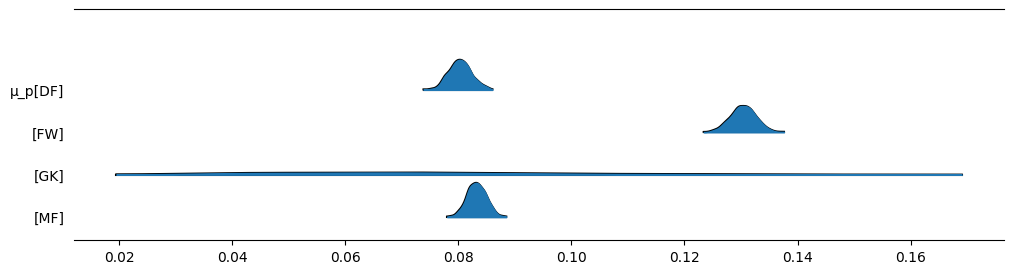

In [18]:
az.plot_forest(idata_sccr, var_names=['μ_p'], combined=True, figsize=(12, 3), kind = 'ridgeplot', hdi_prob=0.998)

In [23]:
sccr_data_no_gk = sccr_data[sccr_data['position'] != 'GK'] #I used gemini for this (i first manually removed gk but it didnt work so i generated this)
display(sccr_data_no_gk.head())

name position  goals  shots
0    Aaron Connolly       FW      5     59
1   Aaron Cresswell       DF      4     69
2        Aaron Hunt       MF      3     30
3      Aaron Lennon       MF      1      5
4  Aaron Leya Iseka       FW     10     76

**Task6**:

Redo the soccer model as a hierarchical model, but remove all the goalkeepers (GK) from the data. In other words, run a hierarchical model on only the defenders, midfielders, and forwards.

array([[<Axes: title={'center': 'θ'}>, <Axes: title={'center': 'θ'}>],
       [<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'μ'}>],
       [<Axes: title={'center': 'μ_p'}>, <Axes: title={'center': 'μ_p'}>],
       [<Axes: title={'center': 'ν'}>, <Axes: title={'center': 'ν'}>],
       [<Axes: title={'center': 'ν_p'}>, <Axes: title={'center': 'ν_p'}>]],
      dtype=object)

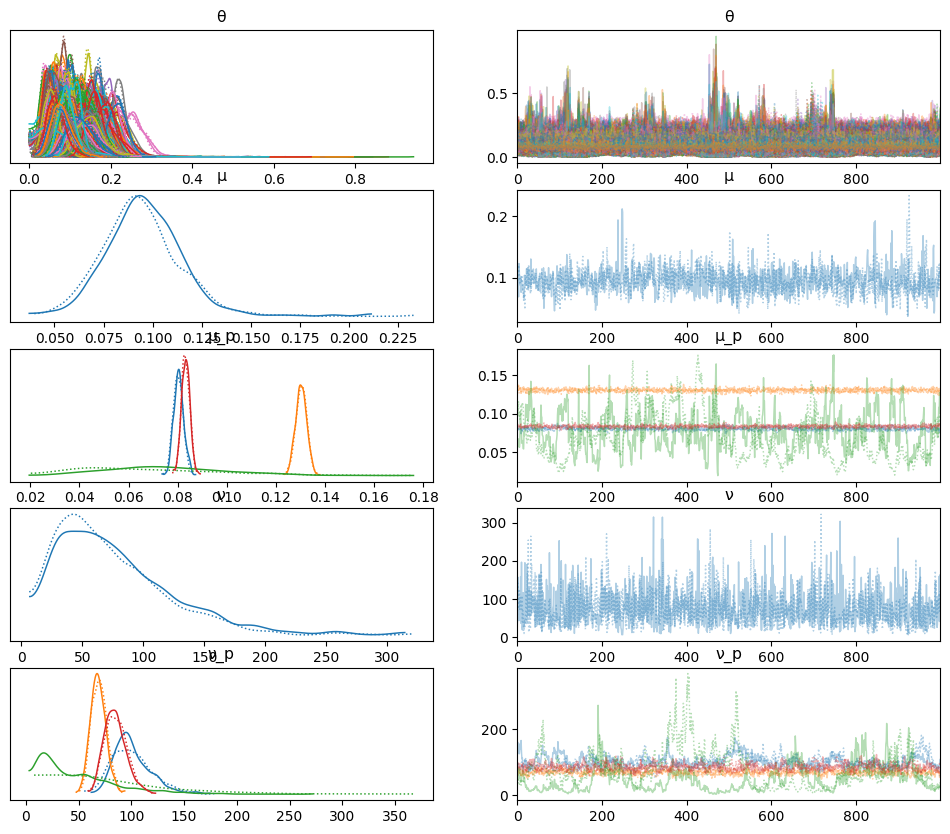

In [27]:
az.plot_trace(idata_sccr)

In [29]:
# Define coordinates for the new dataset without GK #used gemini!
sccr_coords_no_gk = {
    "pos": sccr_data_no_gk.position.cat.categories.values,
    "player": sccr_data_no_gk.name.values,
}

# Get the position indices for the new dataset
pos_idx_no_gk = sccr_data_no_gk.position.cat.codes.values

# Define and fit the hierarchical model without GK
with pm.Model(coords=sccr_coords_no_gk) as sccr_model_no_gk:
    # Hyperparameters
    μ = pm.Beta('μ', alpha=2, beta=20)
    ν = pm.Gamma('ν', mu=55, sigma=45)

    # Parameters for positions
    μ_p = pm.Beta('μ_p', mu=μ, nu=ν, dims="pos")
    ν_p = pm.Gamma('ν_p', mu=55, sigma=45, dims="pos")

    # Parameter for players
    θ = pm.Beta('θ', mu=μ_p[pos_idx_no_gk], nu=ν_p[pos_idx_no_gk])

    # Likelihood
    _ = pm.Binomial('gs',
                    n=sccr_data_no_gk.shots.values,
                    p=θ,
                    observed=sccr_data_no_gk.goals.values)

    # Sample the posterior
    idata_sccr_no_gk = pm.sample(target_accept=0.95)

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


array([[<Axes: title={'center': 'θ'}>, <Axes: title={'center': 'θ'}>],
       [<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'μ'}>],
       [<Axes: title={'center': 'μ_p'}>, <Axes: title={'center': 'μ_p'}>],
       [<Axes: title={'center': 'ν'}>, <Axes: title={'center': 'ν'}>],
       [<Axes: title={'center': 'ν_p'}>, <Axes: title={'center': 'ν_p'}>]],
      dtype=object)

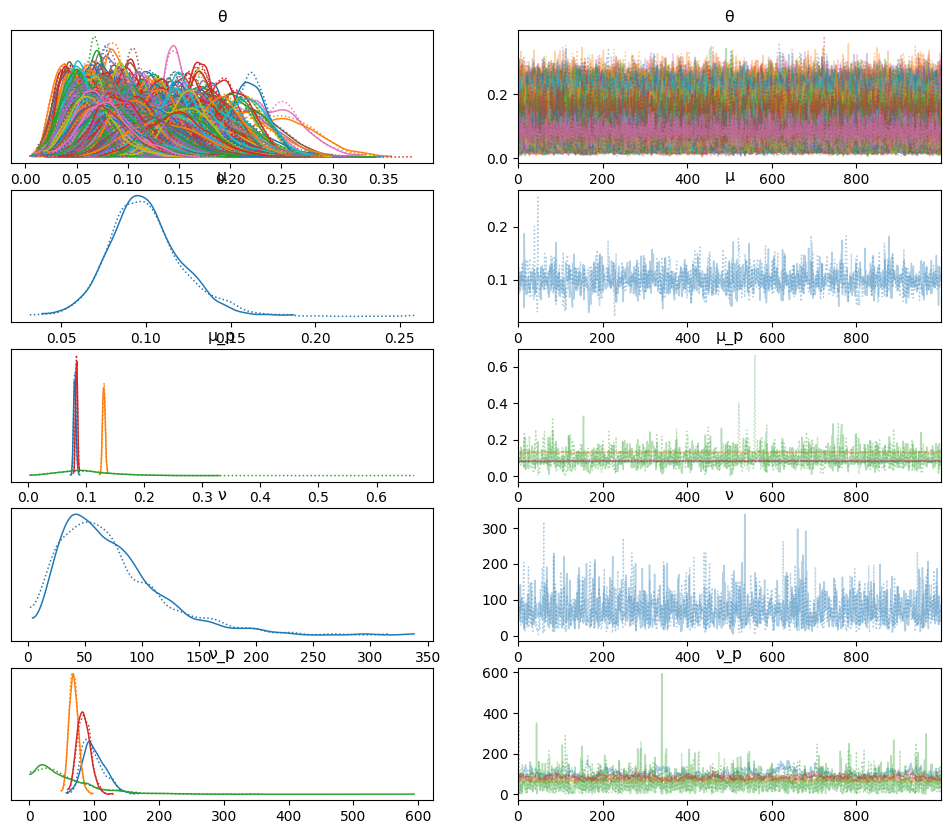

In [30]:
az.plot_trace(idata_sccr_no_gk)

**Task7**:

Compare the plot trace and rhat results for the hierarchical model with GKs and without GKs. Then answer the following questions:
- Which model was easier for pymc to process?
- What do we lose by dropping Gks from the data set? What do we gain?

the model without the goalkeeper was easier to plot because the R was between 1 and 1.001. the gk values are hard to predict, removing these values improve the overall accurate bcuz they rarely shoot.